# Interpolating profiler data to a regular grid
---

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy.interpolate import griddata

sns.set()

In [2]:
profiler_data = pd.read_csv('../../coastal_upwelling_output/profiler_data_2018.csv')

In [3]:
CUTI_data = pd.read_csv('../../coastal_upwelling_output/CUTI_daily.csv',
                  parse_dates=[[0,1,2]],
                  infer_datetime_format=True)
CUTI_data.rename(columns={'year_month_day':'time'},inplace=True)

In [4]:
profiler_data.time

0           2018-07-17 15:38:50.061576192
1           2018-07-17 15:38:51.061581824
2           2018-07-17 15:38:52.061271552
3           2018-07-17 15:38:53.061588992
4           2018-07-17 15:38:54.061177344
                        ...              
13164698    2018-12-31 11:59:55.458120192
13164699    2018-12-31 11:59:56.458231296
13164700    2018-12-31 11:59:57.458030592
13164701    2018-12-31 11:59:58.457932288
13164702    2018-12-31 11:59:59.458563072
Name: time, Length: 13164703, dtype: object

In [5]:
profiler_data['time'] = pd.to_datetime(profiler_data['time'])

In [6]:
# profiler_minutes = profiler_data.resample('T', on='time').mean().dropna(how='all').reset_index()
# profiler_minutes.head()

profiler_hourly = profiler_data.resample('H', on='time').mean().dropna(how='all').reset_index()
# # profiler_hourly.head()

# profiler_daily = profiler_data.resample('D', on='time').mean().dropna(how='all').reset_index()
# # profiler_daily.head()

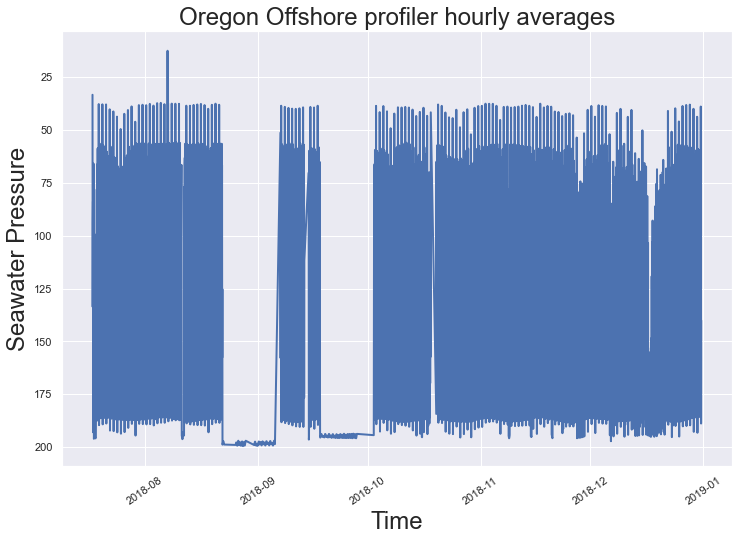

In [7]:
# Plot hourly-averaged METBK data
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(12,8))
ax.plot(profiler_hourly['time'], profiler_hourly['seawater_pressure'], 'b', linewidth=2)
ax.set_xlabel('Time', size=24)
ax.set_ylabel('Seawater Pressure', size=24)
ax.set_title('Oregon Offshore profiler hourly averages', size=24)
ax.invert_yaxis()

plt.xticks(rotation=35);

There are several times where the sensor appears to be non-functional. I don' want to interpolate over these regions, because the interpolation won't be at all informed of the true structure of the water column. I decided to create a dictionary containing the start and end dates of time periods I want to drop, as the key:value pairs. Then I can drop them all at once, see how much of the data I've lost, concatenate the dataframe to prevent gaps in the water column being passed to the interpolation and gridding function.

To choose the time periods to drop, I need to investigate each period one by one...

In [8]:
dates_to_drop = {}

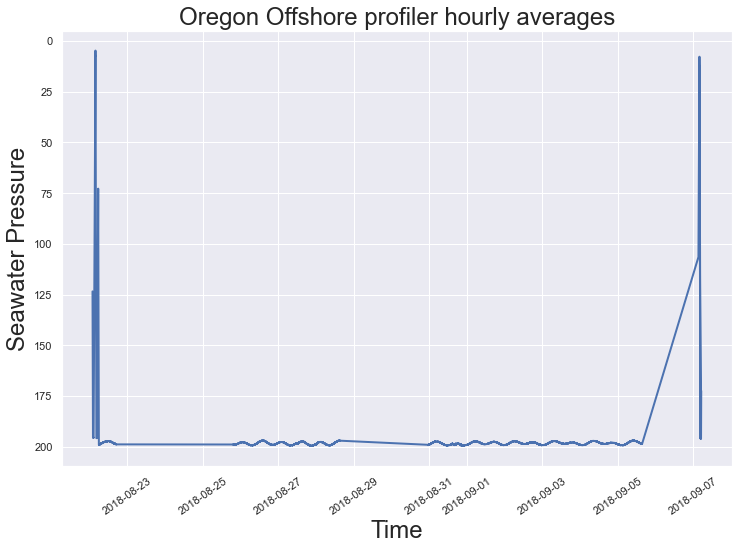

In [9]:
mask = (profiler_data['time'][:] > '2018-08-22 02:00:00') & (profiler_data['time'] <= '2018-09-07 05:00:00').reset_index(drop=True)
df_temp = profiler_data.loc[mask].reset_index(drop=True)

fig, ax = plt.subplots(1, 1, sharex=True, figsize=(12,8))
ax.plot(df_temp['time'], df_temp['seawater_pressure'], 'b', linewidth=2)
ax.set_xlabel('Time', size=24)
ax.set_ylabel('Seawater Pressure', size=24)
ax.set_title('Oregon Offshore profiler hourly averages', size=24)
ax.invert_yaxis()

plt.xticks(rotation=35);

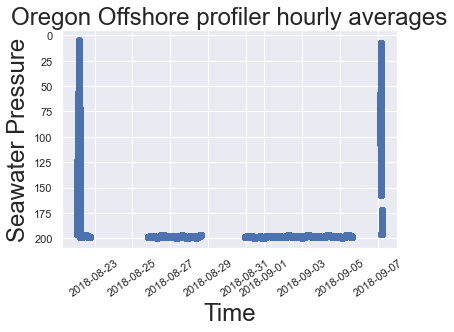

In [10]:
mask = (profiler_data['time'][:] > '2018-08-22 02:00:00') & (profiler_data['time'] <= '2018-09-07 05:00:00').reset_index(drop=True)
df_temp = profiler_data.loc[mask].reset_index(drop=True)

fig, ax = plt.subplots(1, 1, sharex=True)
ax.scatter(df_temp['time'], df_temp['seawater_pressure'])
ax.set_xlabel('Time', size=24)
ax.set_ylabel('Seawater Pressure', size=24)
ax.set_title('Oregon Offshore profiler hourly averages', size=24)
ax.invert_yaxis()

plt.xticks(rotation=35);

In [11]:
df = profiler_data

In [12]:
# mask = (df['time'] > '2018-08-22 02:00:00') & (df['time'] <= '2018-09-07 05:00:00')
# df.drop(index=df.loc[mask][:].index, axis=0, inplace=True)
# df.reset_index(drop=True)

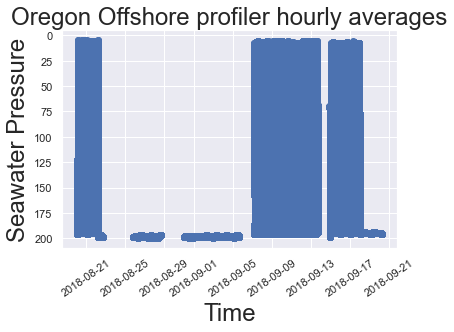

In [13]:
mask = (profiler_data['time'][:] > '2018-08-20 02:00:00') & (profiler_data['time'] <= '2018-09-20 05:00:00').reset_index(drop=True)
df_temp = profiler_data.loc[mask].reset_index(drop=True)

fig, ax = plt.subplots(1, 1, sharex=True)
ax.scatter(x=df_temp['time'], y=df_temp['seawater_pressure'])
ax.set_xlabel('Time', size=24)
ax.set_ylabel('Seawater Pressure', size=24)
ax.set_title('Oregon Offshore profiler hourly averages', size=24)
ax.invert_yaxis()

plt.xticks(rotation=35);

Now there's no data here! We can repeat this a couple more times. 

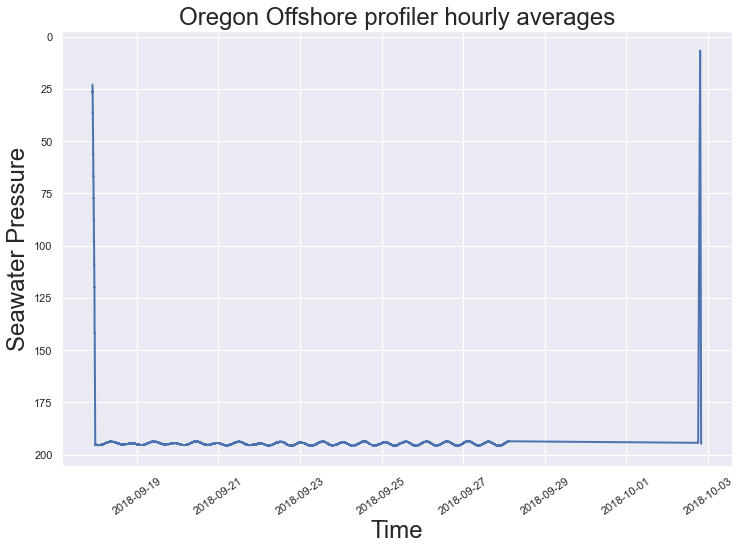

In [14]:
mask = (profiler_data['time'][:] > '2018-09-17 22:00:00') & (profiler_data['time'] <= '2018-10-02 20:00:00')
df_temp = profiler_data.loc[mask].reset_index(drop=True)

fig, ax = plt.subplots(1, 1, sharex=True, figsize=(12,8))
ax.plot(df_temp['time'], df_temp['seawater_pressure'], 'b', linewidth=2)
ax.set_xlabel('Time', size=24)
ax.set_ylabel('Seawater Pressure', size=24)
ax.set_title('Oregon Offshore profiler hourly averages', size=24)
ax.invert_yaxis()

plt.xticks(rotation=35);

In [15]:
# mask = (df['time'] > '2018-09-17 22:00:00') & (df['time'] <= '2018-10-02 20:00:00')
# df.drop(index=df.loc[mask][:].index, axis=0, inplace=True)
# df.reset_index(drop=True)

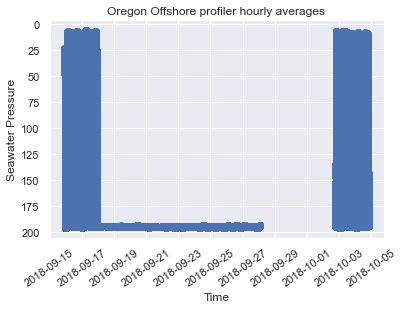

In [16]:
mask = (df['time'] > '2018-09-15 22:00:00') & (profiler_data['time'] <= '2018-10-04 20:00:00')
df_temp = profiler_data.loc[mask].reset_index(drop=True)

fig, ax = plt.subplots(1, 1, sharex=True)
ax.scatter(x=df_temp['time'], y=df_temp['seawater_pressure'])
ax.set_xlabel('Time')
ax.set_ylabel('Seawater Pressure')
ax.set_title('Oregon Offshore profiler hourly averages')
ax.invert_yaxis()

plt.xticks(rotation=35);

Let's do just one more for now.

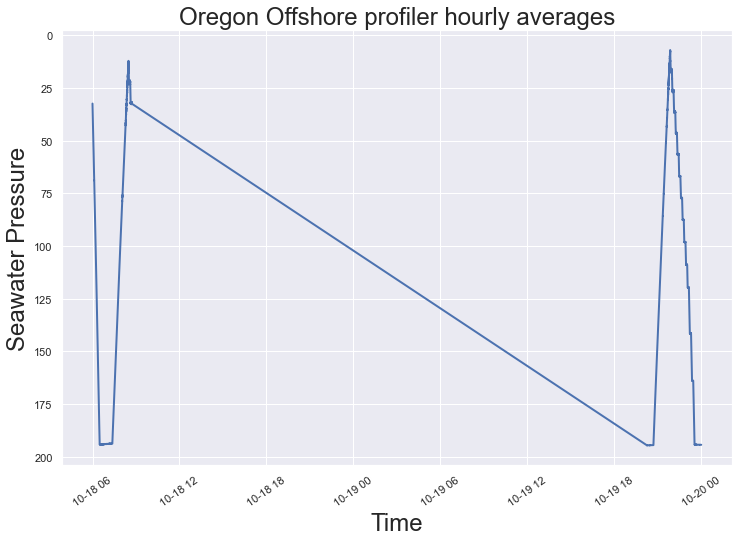

In [18]:
mask = (profiler_data['time'][:] > '2018-10-18 06:00:00') & (profiler_data['time'] <= '2018-10-20 00:00:00')
df_temp = profiler_data.loc[mask].reset_index(drop=True)

fig, ax = plt.subplots(1, 1, sharex=True, figsize=(12,8))
ax.plot(df_temp['time'], df_temp['seawater_pressure'], 'b', linewidth=2)
ax.set_xlabel('Time', size=24)
ax.set_ylabel('Seawater Pressure', size=24)
ax.set_title('Oregon Offshore profiler hourly averages', size=24)
ax.invert_yaxis()

plt.xticks(rotation=35);

In [19]:
# mask = (df['time'] > '2018-10-18 06:00:00') & (df['time'] <= '2018-10-20 00:00:00')
# df.drop(index=df.loc[mask][:].index, axis=0, inplace=True)
# df.reset_index(drop=True, inplace=True)

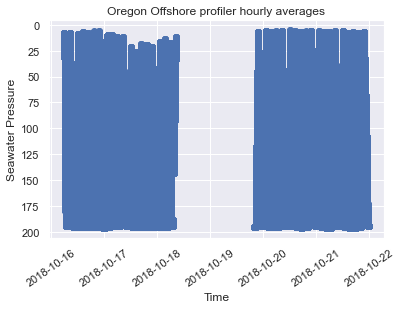

In [20]:
mask = (df['time'] > '2018-10-16 06:00:00') & (profiler_data['time'] <= '2018-10-22 00:00:00')
df_temp = profiler_data.loc[mask].reset_index(drop=True)

fig, ax = plt.subplots(1, 1, sharex=True)
ax.scatter(x=df_temp['time'], y=df_temp['seawater_pressure'])
ax.set_xlabel('Time')
ax.set_ylabel('Seawater Pressure')
ax.set_title('Oregon Offshore profiler hourly averages')
ax.invert_yaxis()

plt.xticks(rotation=35);

In [21]:
df

,time,seawater_pressure,density,practical_salinity,seawater_temperature,corrected_dissolved_oxygen
0,2018-07-17 15:38:50.061576192,81.279138,1026.516091,33.675824,8.613400,92.728326
1,2018-07-17 15:38:51.061581824,81.182077,1026.515845,33.675754,8.611768,92.708655
2,2018-07-17 15:38:52.061271552,81.084999,1026.515921,33.676071,8.610009,92.688996
3,2018-07-17 15:38:53.061588992,80.987921,1026.517571,33.678387,8.608188,92.679191
4,2018-07-17 15:38:54.061177344,80.889759,1026.518862,33.680522,8.607749,92.633305
...,...,...,...,...,...,...
13164698,2018-12-31 11:59:55.458120192,61.875097,1025.117886,32.660133,11.666675,258.166072
13164699,2018-12-31 11:59:56.458231296,61.828144,1025.117640,32.660090,11.666675,258.112745
13164700,2018-12-31 11:59:57.458030592,61.794006,1025.117535,32.660169,11.666744,258.100726
13164701,2018-12-31 11:59:58.457932288,61.756694,1025.117198,32.660002,11.666952,258.181654


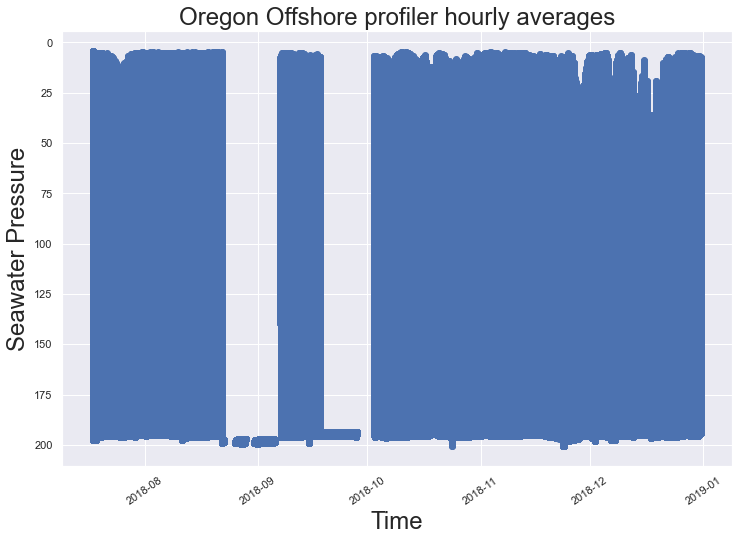

In [22]:
# Plot hourly-averaged METBK data
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(12,8))
ax.scatter(df['time'], df['seawater_pressure'])
ax.set_xlabel('Time', size=24)
ax.set_ylabel('Seawater Pressure', size=24)
ax.set_title('Oregon Offshore profiler hourly averages', size=24)
ax.invert_yaxis()

plt.xticks(rotation=35);

### Using `griddata()`
Apparently it's recommended that you add gaps in AFTER interpolating instead of removing the data prior to interpolating. Might delete everything above later... According to: https://www.mathworks.com/matlabcentral/answers/363643-use-griddata-ignoring-gaps-in-data

In [23]:
df = profiler_data

In [24]:
df_resampled = df.resample('T', on='time').mean().dropna(how='all').reset_index()
df_resampled['time']

0        2018-07-17 15:38:00
1        2018-07-17 15:39:00
2        2018-07-17 15:40:00
3        2018-07-17 15:41:00
4        2018-07-17 15:42:00
                 ...        
219456   2018-12-31 11:55:00
219457   2018-12-31 11:56:00
219458   2018-12-31 11:57:00
219459   2018-12-31 11:58:00
219460   2018-12-31 11:59:00
Name: time, Length: 219461, dtype: datetime64[ns]

In [25]:
mask = (df_resampled['time'][:] > '2018-12-01') & (df_resampled['time'] <= '2018-12-02')
df_resampled = df_resampled.loc[mask].reset_index(drop=True)

In [26]:
# mask = (profiler_data['time'][:] > '2018-12-01') & (profiler_data['time'] <= '2018-12-01').reset_index(drop=True)
# df = profiler_data.loc[mask].reset_index(drop=True)
# # df = df.resample('T', on='time').mean().dropna(how='all').reset_index()
# df['time']

In [27]:
df_resampled['time_'] = df_resampled['time'].values.astype(object)

In [28]:
df_resampled['time_']

0       1543622460000000000
1       1543622520000000000
2       1543622580000000000
3       1543622640000000000
4       1543622700000000000
               ...         
1435    1543708560000000000
1436    1543708620000000000
1437    1543708680000000000
1438    1543708740000000000
1439    1543708800000000000
Name: time_, Length: 1440, dtype: object

In [29]:
# data coordinates and values
x = df_resampled.time_.astype(np.int64) / 100000000000 # np.random.random(100)
y = df_resampled.seawater_pressure # np.random.random(100)
z = df_resampled.seawater_temperature # np.random.random(100)

In [30]:
x

0       15436224.6
1       15436225.2
2       15436225.8
3       15436226.4
4       15436227.0
           ...    
1435    15437085.6
1436    15437086.2
1437    15437086.8
1438    15437087.4
1439    15437088.0
Name: time_, Length: 1440, dtype: float64

In [31]:
x.describe()

count    1.440000e+03
mean     1.543666e+07
std      2.495019e+02
min      1.543622e+07
25%      1.543644e+07
50%      1.543666e+07
75%      1.543687e+07
max      1.543709e+07
Name: time_, dtype: float64

In [32]:
y.describe()

count    1440.000000
mean      125.245501
std        61.703579
min         7.848650
25%        69.248796
50%       131.466889
75%       193.776958
max       196.583256
Name: seawater_pressure, dtype: float64

In [33]:
# target grid to interpolate to
xi = np.arange(min(x), max(x), 50)
yi = np.arange(min(y), max(y), 6)
xi

array([15436224.6, 15436274.6, 15436324.6, 15436374.6, 15436424.6,
       15436474.6, 15436524.6, 15436574.6, 15436624.6, 15436674.6,
       15436724.6, 15436774.6, 15436824.6, 15436874.6, 15436924.6,
       15436974.6, 15437024.6, 15437074.6])

In [34]:
xi,yi = np.meshgrid(xi,yi)

In [35]:
xi.shape

(32, 18)

In [36]:
yi.shape

(32, 18)

Creating the interpolated gridded data takes a minute to finish running when you pass it 13M data points. 

In [37]:
# interpolate
# zi_nearest = griddata((x,y),z,(xi,yi),method='nearest', rescale=True)
zi_linear = griddata((x,y),z,(xi,yi),method='linear', rescale=True)
# zi_cubic = griddata((x,y),z,(xi,yi),method='cubic', rescale=True)

In [38]:
# set masks to recreate gaps in our data
mask1 = (df_resampled['time'] > '2018-08-22 02:00:00') & (df_resampled['time'] <= '2018-09-07 05:00:00')
mask2 = (df_resampled['time'] > '2018-09-15 22:00:00') & (df_resampled['time'] <= '2018-10-04 20:00:00')
mask3 = (df_resampled['time'] > '2018-10-16 06:00:00') & (df_resampled['time'] <= '2018-10-22 00:00:00')

In [39]:
sns.set_style('whitegrid')

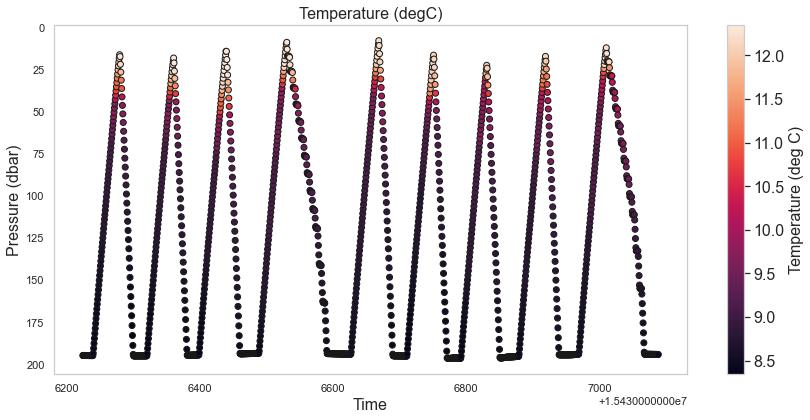

In [40]:
fig, ax = plt.subplots(figsize=(12,6))

ax.invert_yaxis()
ax.grid()

sc = ax.scatter(x,y,c=z,edgecolors='k')
ax.set_xlabel('Time', size=16)
ax.set_ylabel('Pressure (dbar)', size=16)
ax.set_title('Temperature (degC)', size=16)
cb = fig.colorbar(sc,ax=ax)
cb.set_label(label='Temperature (deg C)', size=16)
cb.ax.tick_params(labelsize=16)

plt.tight_layout()
plt.savefig('../figures/dec-01_raw.png')

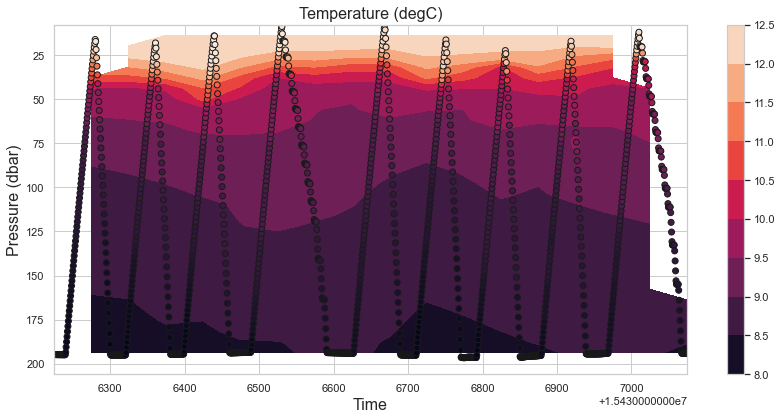

In [41]:
fig, ax = plt.subplots(figsize=(12,6))

cs2 = ax.contourf(xi,yi,zi_linear)
plt.colorbar(cs2, ax=ax)
ax.scatter(x, y, c=z,edgecolors='k')
ax.invert_yaxis()
# ax.set_title("Using method='linear'",fontsize=16)
ax.set_xlabel('Time', size=16)
ax.set_ylabel('Pressure (dbar)', size=16)
ax.set_title('Temperature (degC)', size=16)
# cb = fig.colorbar(sc,ax=ax)
# cb = plt.colorbar(cs2, ax=ax)
cb.set_label(label='Temperature (deg C)', size=16)
cb.ax.tick_params(labelsize=16)

plt.tight_layout()
plt.savefig('../figures/dec-01_griddata.png')

### Add more data 

In [42]:
df_resampled = df

In [43]:
df_resampled['time']

0          2018-07-17 15:38:50.061576192
1          2018-07-17 15:38:51.061581824
2          2018-07-17 15:38:52.061271552
3          2018-07-17 15:38:53.061588992
4          2018-07-17 15:38:54.061177344
                        ...             
13164698   2018-12-31 11:59:55.458120192
13164699   2018-12-31 11:59:56.458231296
13164700   2018-12-31 11:59:57.458030592
13164701   2018-12-31 11:59:58.457932288
13164702   2018-12-31 11:59:59.458563072
Name: time, Length: 13164703, dtype: datetime64[ns]

In [44]:
mask = (df_resampled['time'][:] > '2018-12-01') & (df_resampled['time'] <= '2018-12-31')
df_resampled = df_resampled.loc[mask].reset_index(drop=True)

In [45]:
# mask = (profiler_data['time'][:] > '2018-12-01') & (profiler_data['time'] <= '2018-12-01').reset_index(drop=True)
# df = profiler_data.loc[mask].reset_index(drop=True)
# # df = df.resample('T', on='time').mean().dropna(how='all').reset_index()
# df['time']

In [46]:
df_resampled['time_'] = df_resampled['time'].values.astype(object)

In [47]:
df_resampled['time_']

0          1543622400177739264
1          1543622401176911360
2          1543622402177646080
3          1543622403176923136
4          1543622404177553920
                  ...         
2590838    1546214395540899328
2590839    1546214396540905984
2590840    1546214397540183040
2590841    1546214398539668992
2590842    1546214399539779072
Name: time_, Length: 2590843, dtype: object

In [48]:
# data coordinates and values
x = df_resampled.time_.astype(np.int64) / 100000000000 # np.random.random(100)
y = df_resampled.seawater_pressure # np.random.random(100)
z = df_resampled.seawater_temperature # np.random.random(100)

In [49]:
# target grid to interpolate to
xi = np.arange(min(x), max(x), 50)
yi = np.arange(min(y), max(y), 6)

In [50]:
xi,yi = np.meshgrid(xi,yi)

In [51]:
xi.shape

(33, 519)

In [52]:
yi.shape

(33, 519)

In [53]:
# interpolate
# zi_nearest = griddata((x,y),z,(xi,yi),method='nearest', rescale=True)
zi_linear = griddata((x,y),z,(xi,yi),method='linear', rescale=True)
# zi_cubic = griddata((x,y),z,(xi,yi),method='cubic', rescale=True)

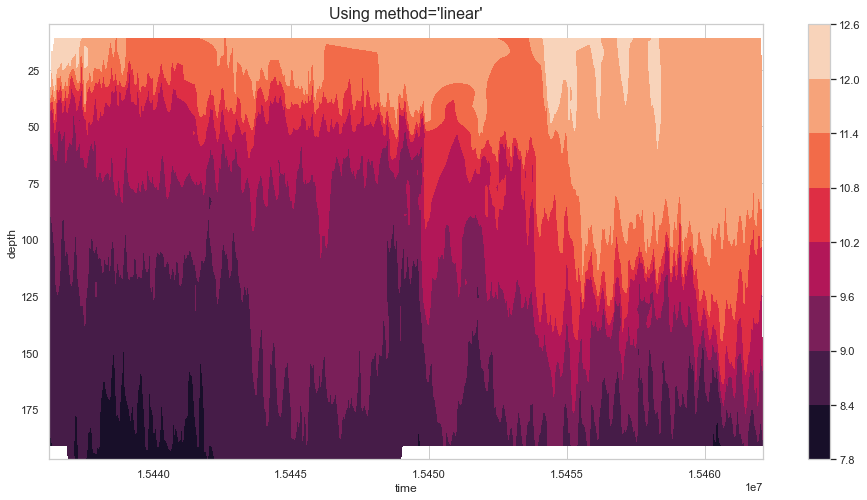

In [54]:
fig, ax = plt.subplots(figsize=(16,8))

cs2 = ax.contourf(xi,yi,zi_linear)
plt.colorbar(cs2, ax=ax)
# ax2.plot(x,y,'k.')
ax.set_xlabel('time')
ax.set_ylabel('depth')
ax.invert_yaxis()
ax.set_title("Using method='linear'",fontsize=16)

plt.savefig('../figures/december_gridded.png')

### ADD MORE DATA

In [55]:
df_resampled = df

In [56]:
df_resampled['time_'] = df_resampled['time'].values.astype(object)

In [57]:
df_resampled['time_']

0           1531841930061576192
1           1531841931061581824
2           1531841932061271552
3           1531841933061588992
4           1531841934061177344
                   ...         
13164698    1546257595458120192
13164699    1546257596458231296
13164700    1546257597458030592
13164701    1546257598457932288
13164702    1546257599458563072
Name: time_, Length: 13164703, dtype: object

In [58]:
# data coordinates and values
x = df_resampled.time_.astype(np.int64) / 100000000000 # np.random.random(100)
y = df_resampled.seawater_pressure # np.random.random(100)
z = df_resampled.seawater_temperature # np.random.random(100)

In [59]:
# target grid to interpolate to
xi = np.arange(min(x), max(x), 50)
yi = np.arange(min(y), max(y), 6)

In [60]:
xi,yi = np.meshgrid(xi,yi)

In [61]:
xi.shape

(33, 2884)

In [62]:
yi.shape

(33, 2884)

In [63]:
# interpolate
# zi_nearest = griddata((x,y),z,(xi,yi),method='nearest', rescale=True)
zi_linear = griddata((x,y),z,(xi,yi),method='linear', rescale=True)
# zi_cubic = griddata((x,y),z,(xi,yi),method='cubic', rescale=True)

In [64]:
df['time']

0          2018-07-17 15:38:50.061576192
1          2018-07-17 15:38:51.061581824
2          2018-07-17 15:38:52.061271552
3          2018-07-17 15:38:53.061588992
4          2018-07-17 15:38:54.061177344
                        ...             
13164698   2018-12-31 11:59:55.458120192
13164699   2018-12-31 11:59:56.458231296
13164700   2018-12-31 11:59:57.458030592
13164701   2018-12-31 11:59:58.457932288
13164702   2018-12-31 11:59:59.458563072
Name: time, Length: 13164703, dtype: datetime64[ns]

In [65]:
['2018-07-17', '2018-08-17', '2018-09-17', '2018-10-17', '2018-11-17', '2018-12-17']

['2018-07-17',
 '2018-08-17',
 '2018-09-17',
 '2018-10-17',
 '2018-11-17',
 '2018-12-17']

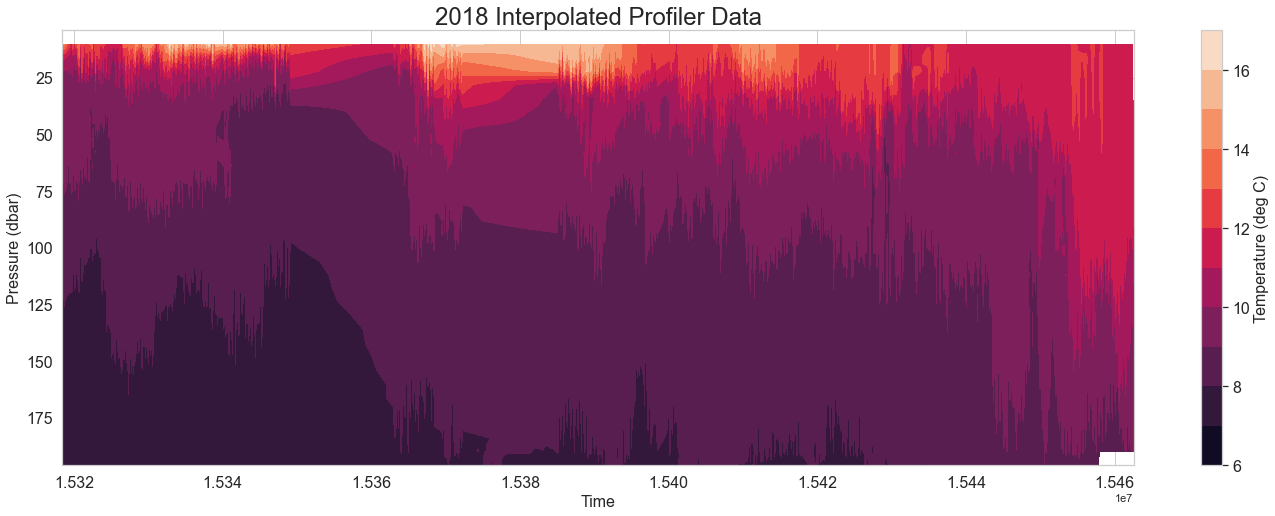

In [66]:
fig, ax = plt.subplots(figsize=(24,8))

cs2 = ax.contourf(xi,yi,zi_linear, levels=10)
cb = plt.colorbar(cs2, ax=ax)
# ax2.plot(x,y,'k.')
ax.set_xlabel('Time',fontsize=16)
ax.set_ylabel('Pressure (dbar)',fontsize=16)
ax.invert_yaxis()
ax.set_title("2018 Interpolated Profiler Data",fontsize=24)

plt.tick_params(axis='both', which='major', labelsize=16)


# cb = fig.colorbar(sc,ax=ax)
cb.set_label(label='Temperature (deg C)', size=16)
cb.ax.tick_params(labelsize=16)

plt.savefig('../figures/2018_gridded.png')

---
### Create a dataframe from the griddata() result

In [67]:
# xi = np.arange(min(x), max(x), 50)
# yi = np.arange(min(y), max(y), 6)

z_df = pd.DataFrame(zi_linear, columns=np.arange(min(x), max(x), 50), index=np.arange(min(y), max(y), 6))

In [68]:
z_df = z_df.T

In [69]:
z_df

,4.122659,10.122659,16.122659,22.122659,28.122659,34.122659,40.122659,46.122659,52.122659,58.122659,...,142.122659,148.122659,154.122659,160.122659,166.122659,172.122659,178.122659,184.122659,190.122659,196.122659
1.531842e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.531847e+07,NaN,14.050275,11.959311,10.073221,9.767676,9.482159,9.105380,9.056556,9.055258,9.038180,...,7.619771,7.586346,7.528777,7.338059,7.275881,7.237259,7.168897,7.087552,7.032359,6.999018
1.531852e+07,NaN,13.957127,10.870573,9.901940,9.695652,9.342295,9.117574,9.069495,9.021141,9.080058,...,7.794354,7.704981,7.655243,7.505627,7.412475,7.401960,7.334573,7.211357,7.136497,7.066432
1.531857e+07,NaN,14.042208,10.949701,9.850174,9.776190,9.300516,9.257225,9.193214,9.130008,9.150563,...,7.836112,7.726186,7.664953,7.591927,7.506104,7.450694,7.371207,7.261236,7.173726,7.114324
1.531862e+07,NaN,14.140387,11.095460,9.932039,9.728931,9.258736,9.346245,9.331689,9.174076,9.217667,...,7.801404,7.722635,7.672826,7.621918,7.514516,7.366019,7.300821,7.201451,7.165526,7.150486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.546237e+07,NaN,11.664340,11.666910,11.672077,11.671022,11.670672,11.668944,11.674786,11.678079,11.679168,...,9.854640,9.777601,9.682765,9.584962,9.474324,9.447541,9.350273,9.149023,9.085589,NaN
1.546242e+07,NaN,11.700740,11.703553,11.706323,11.702944,11.703475,11.694362,11.681661,11.683158,11.667642,...,9.813931,9.698328,9.644930,9.536831,9.466511,9.332183,9.285570,9.167243,9.092787,NaN
1.546247e+07,NaN,NaN,11.718391,11.723114,11.727171,11.728280,11.724587,11.685371,11.663589,11.647634,...,9.589894,9.473837,9.402972,9.344600,9.266781,9.181462,9.108148,9.051278,9.015645,NaN
1.546252e+07,NaN,NaN,NaN,NaN,NaN,NaN,11.697804,11.699563,11.693827,11.661383,...,9.475729,9.372364,9.288699,9.220885,9.137807,9.080314,8.992957,8.963595,8.941057,NaN


In [70]:
col_dict = {k:int(k) for k in z_df.columns}
col_dict

{4.122658608457757: 4,
 10.122658608457757: 10,
 16.122658608457755: 16,
 22.122658608457755: 22,
 28.122658608457755: 28,
 34.122658608457755: 34,
 40.122658608457755: 40,
 46.122658608457755: 46,
 52.122658608457755: 52,
 58.122658608457755: 58,
 64.12265860845775: 64,
 70.12265860845775: 70,
 76.12265860845775: 76,
 82.12265860845775: 82,
 88.12265860845775: 88,
 94.12265860845775: 94,
 100.12265860845775: 100,
 106.12265860845775: 106,
 112.12265860845775: 112,
 118.12265860845775: 118,
 124.12265860845775: 124,
 130.12265860845775: 130,
 136.12265860845775: 136,
 142.12265860845775: 142,
 148.12265860845775: 148,
 154.12265860845775: 154,
 160.12265860845775: 160,
 166.12265860845775: 166,
 172.12265860845775: 172,
 178.12265860845775: 178,
 184.12265860845775: 184,
 190.12265860845775: 190,
 196.12265860845775: 196}

In [71]:
z_df.rename(col_dict, inplace=True, axis=1)

In [72]:
z_df['time'] = z_df.index

z_df['time'] = 100000000000 * z_df['time']
z_df

,4,10,16,22,28,34,40,46,52,58,...,148,154,160,166,172,178,184,190,196,time
1.531842e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.531842e+18
1.531847e+07,NaN,14.050275,11.959311,10.073221,9.767676,9.482159,9.105380,9.056556,9.055258,9.038180,...,7.586346,7.528777,7.338059,7.275881,7.237259,7.168897,7.087552,7.032359,6.999018,1.531847e+18
1.531852e+07,NaN,13.957127,10.870573,9.901940,9.695652,9.342295,9.117574,9.069495,9.021141,9.080058,...,7.704981,7.655243,7.505627,7.412475,7.401960,7.334573,7.211357,7.136497,7.066432,1.531852e+18
1.531857e+07,NaN,14.042208,10.949701,9.850174,9.776190,9.300516,9.257225,9.193214,9.130008,9.150563,...,7.726186,7.664953,7.591927,7.506104,7.450694,7.371207,7.261236,7.173726,7.114324,1.531857e+18
1.531862e+07,NaN,14.140387,11.095460,9.932039,9.728931,9.258736,9.346245,9.331689,9.174076,9.217667,...,7.722635,7.672826,7.621918,7.514516,7.366019,7.300821,7.201451,7.165526,7.150486,1.531862e+18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.546237e+07,NaN,11.664340,11.666910,11.672077,11.671022,11.670672,11.668944,11.674786,11.678079,11.679168,...,9.777601,9.682765,9.584962,9.474324,9.447541,9.350273,9.149023,9.085589,NaN,1.546237e+18
1.546242e+07,NaN,11.700740,11.703553,11.706323,11.702944,11.703475,11.694362,11.681661,11.683158,11.667642,...,9.698328,9.644930,9.536831,9.466511,9.332183,9.285570,9.167243,9.092787,NaN,1.546242e+18
1.546247e+07,NaN,NaN,11.718391,11.723114,11.727171,11.728280,11.724587,11.685371,11.663589,11.647634,...,9.473837,9.402972,9.344600,9.266781,9.181462,9.108148,9.051278,9.015645,NaN,1.546247e+18
1.546252e+07,NaN,NaN,NaN,NaN,NaN,NaN,11.697804,11.699563,11.693827,11.661383,...,9.372364,9.288699,9.220885,9.137807,9.080314,8.992957,8.963595,8.941057,NaN,1.546252e+18


In [73]:
z_df['time'] = pd.to_datetime(z_df['time'])
z_df

,4,10,16,22,28,34,40,46,52,58,...,148,154,160,166,172,178,184,190,196,time
1.531842e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-07-17 15:38:50.061576192
1.531847e+07,NaN,14.050275,11.959311,10.073221,9.767676,9.482159,9.105380,9.056556,9.055258,9.038180,...,7.586346,7.528777,7.338059,7.275881,7.237259,7.168897,7.087552,7.032359,6.999018,2018-07-17 17:02:10.061576192
1.531852e+07,NaN,13.957127,10.870573,9.901940,9.695652,9.342295,9.117574,9.069495,9.021141,9.080058,...,7.704981,7.655243,7.505627,7.412475,7.401960,7.334573,7.211357,7.136497,7.066432,2018-07-17 18:25:30.061576192
1.531857e+07,NaN,14.042208,10.949701,9.850174,9.776190,9.300516,9.257225,9.193214,9.130008,9.150563,...,7.726186,7.664953,7.591927,7.506104,7.450694,7.371207,7.261236,7.173726,7.114324,2018-07-17 19:48:50.061576192
1.531862e+07,NaN,14.140387,11.095460,9.932039,9.728931,9.258736,9.346245,9.331689,9.174076,9.217667,...,7.722635,7.672826,7.621918,7.514516,7.366019,7.300821,7.201451,7.165526,7.150486,2018-07-17 21:12:10.061576192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.546237e+07,NaN,11.664340,11.666910,11.672077,11.671022,11.670672,11.668944,11.674786,11.678079,11.679168,...,9.777601,9.682765,9.584962,9.474324,9.447541,9.350273,9.149023,9.085589,NaN,2018-12-31 06:15:30.061576192
1.546242e+07,NaN,11.700740,11.703553,11.706323,11.702944,11.703475,11.694362,11.681661,11.683158,11.667642,...,9.698328,9.644930,9.536831,9.466511,9.332183,9.285570,9.167243,9.092787,NaN,2018-12-31 07:38:50.061576192
1.546247e+07,NaN,NaN,11.718391,11.723114,11.727171,11.728280,11.724587,11.685371,11.663589,11.647634,...,9.473837,9.402972,9.344600,9.266781,9.181462,9.108148,9.051278,9.015645,NaN,2018-12-31 09:02:10.061576192
1.546252e+07,NaN,NaN,NaN,NaN,NaN,NaN,11.697804,11.699563,11.693827,11.661383,...,9.372364,9.288699,9.220885,9.137807,9.080314,8.992957,8.963595,8.941057,NaN,2018-12-31 10:25:30.061576192


---
### Append CUTI data

In [74]:
CUTI_data = CUTI_data[CUTI_data['time'].dt.year == 2018][['time', '44N']].reset_index(drop=True)
CUTI_data

,time,44N
0,2018-01-01,0.095
1,2018-01-02,-0.207
2,2018-01-03,0.648
3,2018-01-04,0.222
4,2018-01-05,-0.682
...,...,...
360,2018-12-27,0.180
361,2018-12-28,-0.339
362,2018-12-29,-0.447
363,2018-12-30,-0.508


In [75]:
for month in range(1, 13): # our dataframe only contains dates up to 2017-09-15
    for day in range(1, 32):
        try:
            indices = z_df[(z_df['time'].dt.month == month) & (z_df['time'].dt.day == day)].index
            cuti_value = CUTI_data.loc[(CUTI_data['time'].dt.month == month) & (CUTI_data['time'].dt.day == day)]['44N'].values[0]
#             print(month, day, cuti_value)
            z_df.loc[indices,'CUTI'] = cuti_value
        except:
            pass

In [76]:
z_df

,4,10,16,22,28,34,40,46,52,58,...,154,160,166,172,178,184,190,196,time,CUTI
1.531842e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-07-17 15:38:50.061576192,0.978
1.531847e+07,NaN,14.050275,11.959311,10.073221,9.767676,9.482159,9.105380,9.056556,9.055258,9.038180,...,7.528777,7.338059,7.275881,7.237259,7.168897,7.087552,7.032359,6.999018,2018-07-17 17:02:10.061576192,0.978
1.531852e+07,NaN,13.957127,10.870573,9.901940,9.695652,9.342295,9.117574,9.069495,9.021141,9.080058,...,7.655243,7.505627,7.412475,7.401960,7.334573,7.211357,7.136497,7.066432,2018-07-17 18:25:30.061576192,0.978
1.531857e+07,NaN,14.042208,10.949701,9.850174,9.776190,9.300516,9.257225,9.193214,9.130008,9.150563,...,7.664953,7.591927,7.506104,7.450694,7.371207,7.261236,7.173726,7.114324,2018-07-17 19:48:50.061576192,0.978
1.531862e+07,NaN,14.140387,11.095460,9.932039,9.728931,9.258736,9.346245,9.331689,9.174076,9.217667,...,7.672826,7.621918,7.514516,7.366019,7.300821,7.201451,7.165526,7.150486,2018-07-17 21:12:10.061576192,0.978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.546237e+07,NaN,11.664340,11.666910,11.672077,11.671022,11.670672,11.668944,11.674786,11.678079,11.679168,...,9.682765,9.584962,9.474324,9.447541,9.350273,9.149023,9.085589,NaN,2018-12-31 06:15:30.061576192,0.256
1.546242e+07,NaN,11.700740,11.703553,11.706323,11.702944,11.703475,11.694362,11.681661,11.683158,11.667642,...,9.644930,9.536831,9.466511,9.332183,9.285570,9.167243,9.092787,NaN,2018-12-31 07:38:50.061576192,0.256
1.546247e+07,NaN,NaN,11.718391,11.723114,11.727171,11.728280,11.724587,11.685371,11.663589,11.647634,...,9.402972,9.344600,9.266781,9.181462,9.108148,9.051278,9.015645,NaN,2018-12-31 09:02:10.061576192,0.256
1.546252e+07,NaN,NaN,NaN,NaN,NaN,NaN,11.697804,11.699563,11.693827,11.661383,...,9.288699,9.220885,9.137807,9.080314,8.992957,8.963595,8.941057,NaN,2018-12-31 10:25:30.061576192,0.256


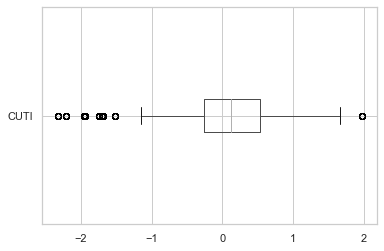

In [77]:
z_df.boxplot('CUTI', vert=False);

In [78]:
z_df['upwelling'] = z_df['CUTI'].apply(lambda x: 1 if x > 0 else 0)

In [79]:
z_df['upwelling'].value_counts(normalize=True)

1    0.599168
0    0.400832
Name: upwelling, dtype: float64

In [80]:
z_df

,4,10,16,22,28,34,40,46,52,58,...,160,166,172,178,184,190,196,time,CUTI,upwelling
1.531842e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-07-17 15:38:50.061576192,0.978,1
1.531847e+07,NaN,14.050275,11.959311,10.073221,9.767676,9.482159,9.105380,9.056556,9.055258,9.038180,...,7.338059,7.275881,7.237259,7.168897,7.087552,7.032359,6.999018,2018-07-17 17:02:10.061576192,0.978,1
1.531852e+07,NaN,13.957127,10.870573,9.901940,9.695652,9.342295,9.117574,9.069495,9.021141,9.080058,...,7.505627,7.412475,7.401960,7.334573,7.211357,7.136497,7.066432,2018-07-17 18:25:30.061576192,0.978,1
1.531857e+07,NaN,14.042208,10.949701,9.850174,9.776190,9.300516,9.257225,9.193214,9.130008,9.150563,...,7.591927,7.506104,7.450694,7.371207,7.261236,7.173726,7.114324,2018-07-17 19:48:50.061576192,0.978,1
1.531862e+07,NaN,14.140387,11.095460,9.932039,9.728931,9.258736,9.346245,9.331689,9.174076,9.217667,...,7.621918,7.514516,7.366019,7.300821,7.201451,7.165526,7.150486,2018-07-17 21:12:10.061576192,0.978,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.546237e+07,NaN,11.664340,11.666910,11.672077,11.671022,11.670672,11.668944,11.674786,11.678079,11.679168,...,9.584962,9.474324,9.447541,9.350273,9.149023,9.085589,NaN,2018-12-31 06:15:30.061576192,0.256,1
1.546242e+07,NaN,11.700740,11.703553,11.706323,11.702944,11.703475,11.694362,11.681661,11.683158,11.667642,...,9.536831,9.466511,9.332183,9.285570,9.167243,9.092787,NaN,2018-12-31 07:38:50.061576192,0.256,1
1.546247e+07,NaN,NaN,11.718391,11.723114,11.727171,11.728280,11.724587,11.685371,11.663589,11.647634,...,9.344600,9.266781,9.181462,9.108148,9.051278,9.015645,NaN,2018-12-31 09:02:10.061576192,0.256,1
1.546252e+07,NaN,NaN,NaN,NaN,NaN,NaN,11.697804,11.699563,11.693827,11.661383,...,9.220885,9.137807,9.080314,8.992957,8.963595,8.941057,NaN,2018-12-31 10:25:30.061576192,0.256,1


In [81]:
z_df.set_index('time', inplace=True)
z_df

,4,10,16,22,28,34,40,46,52,58,...,154,160,166,172,178,184,190,196,CUTI,upwelling
time,,,,,,,,,,,,,,,,,,,,,
2018-07-17 15:38:50.061576192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.978,1
2018-07-17 17:02:10.061576192,NaN,14.050275,11.959311,10.073221,9.767676,9.482159,9.105380,9.056556,9.055258,9.038180,...,7.528777,7.338059,7.275881,7.237259,7.168897,7.087552,7.032359,6.999018,0.978,1
2018-07-17 18:25:30.061576192,NaN,13.957127,10.870573,9.901940,9.695652,9.342295,9.117574,9.069495,9.021141,9.080058,...,7.655243,7.505627,7.412475,7.401960,7.334573,7.211357,7.136497,7.066432,0.978,1
2018-07-17 19:48:50.061576192,NaN,14.042208,10.949701,9.850174,9.776190,9.300516,9.257225,9.193214,9.130008,9.150563,...,7.664953,7.591927,7.506104,7.450694,7.371207,7.261236,7.173726,7.114324,0.978,1
2018-07-17 21:12:10.061576192,NaN,14.140387,11.095460,9.932039,9.728931,9.258736,9.346245,9.331689,9.174076,9.217667,...,7.672826,7.621918,7.514516,7.366019,7.300821,7.201451,7.165526,7.150486,0.978,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 06:15:30.061576192,NaN,11.664340,11.666910,11.672077,11.671022,11.670672,11.668944,11.674786,11.678079,11.679168,...,9.682765,9.584962,9.474324,9.447541,9.350273,9.149023,9.085589,NaN,0.256,1
2018-12-31 07:38:50.061576192,NaN,11.700740,11.703553,11.706323,11.702944,11.703475,11.694362,11.681661,11.683158,11.667642,...,9.644930,9.536831,9.466511,9.332183,9.285570,9.167243,9.092787,NaN,0.256,1
2018-12-31 09:02:10.061576192,NaN,NaN,11.718391,11.723114,11.727171,11.728280,11.724587,11.685371,11.663589,11.647634,...,9.402972,9.344600,9.266781,9.181462,9.108148,9.051278,9.015645,NaN,0.256,1


In [82]:
z_df.isna().sum()

4            2884
10              4
16              3
22              3
28              3
34              3
40              2
46              2
52              2
58              2
64              1
70              1
76              1
82              1
88              1
94              2
100             2
106             2
112             2
118             2
124             2
130             2
136             2
142             2
148             2
154             2
160             2
166             2
172             2
178             2
184             2
190             2
196            95
CUTI            0
upwelling       0
dtype: int64

Need to drop the first column because it's entirely NANs.

In [83]:
z_df.drop(columns=z_df.columns[0], inplace=True)
# df.isna().sum()
z_df

,10,16,22,28,34,40,46,52,58,64,...,154,160,166,172,178,184,190,196,CUTI,upwelling
time,,,,,,,,,,,,,,,,,,,,,
2018-07-17 15:38:50.061576192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.978,1
2018-07-17 17:02:10.061576192,14.050275,11.959311,10.073221,9.767676,9.482159,9.105380,9.056556,9.055258,9.038180,8.987498,...,7.528777,7.338059,7.275881,7.237259,7.168897,7.087552,7.032359,6.999018,0.978,1
2018-07-17 18:25:30.061576192,13.957127,10.870573,9.901940,9.695652,9.342295,9.117574,9.069495,9.021141,9.080058,9.081508,...,7.655243,7.505627,7.412475,7.401960,7.334573,7.211357,7.136497,7.066432,0.978,1
2018-07-17 19:48:50.061576192,14.042208,10.949701,9.850174,9.776190,9.300516,9.257225,9.193214,9.130008,9.150563,9.106404,...,7.664953,7.591927,7.506104,7.450694,7.371207,7.261236,7.173726,7.114324,0.978,1
2018-07-17 21:12:10.061576192,14.140387,11.095460,9.932039,9.728931,9.258736,9.346245,9.331689,9.174076,9.217667,9.102127,...,7.672826,7.621918,7.514516,7.366019,7.300821,7.201451,7.165526,7.150486,0.978,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 06:15:30.061576192,11.664340,11.666910,11.672077,11.671022,11.670672,11.668944,11.674786,11.678079,11.679168,11.684269,...,9.682765,9.584962,9.474324,9.447541,9.350273,9.149023,9.085589,NaN,0.256,1
2018-12-31 07:38:50.061576192,11.700740,11.703553,11.706323,11.702944,11.703475,11.694362,11.681661,11.683158,11.667642,11.597506,...,9.644930,9.536831,9.466511,9.332183,9.285570,9.167243,9.092787,NaN,0.256,1
2018-12-31 09:02:10.061576192,NaN,11.718391,11.723114,11.727171,11.728280,11.724587,11.685371,11.663589,11.647634,11.551727,...,9.402972,9.344600,9.266781,9.181462,9.108148,9.051278,9.015645,NaN,0.256,1


In [84]:
z_df.dropna(axis=0, inplace=True)
z_df

,10,16,22,28,34,40,46,52,58,64,...,154,160,166,172,178,184,190,196,CUTI,upwelling
time,,,,,,,,,,,,,,,,,,,,,
2018-07-17 17:02:10.061576192,14.050275,11.959311,10.073221,9.767676,9.482159,9.105380,9.056556,9.055258,9.038180,8.987498,...,7.528777,7.338059,7.275881,7.237259,7.168897,7.087552,7.032359,6.999018,0.978,1
2018-07-17 18:25:30.061576192,13.957127,10.870573,9.901940,9.695652,9.342295,9.117574,9.069495,9.021141,9.080058,9.081508,...,7.655243,7.505627,7.412475,7.401960,7.334573,7.211357,7.136497,7.066432,0.978,1
2018-07-17 19:48:50.061576192,14.042208,10.949701,9.850174,9.776190,9.300516,9.257225,9.193214,9.130008,9.150563,9.106404,...,7.664953,7.591927,7.506104,7.450694,7.371207,7.261236,7.173726,7.114324,0.978,1
2018-07-17 21:12:10.061576192,14.140387,11.095460,9.932039,9.728931,9.258736,9.346245,9.331689,9.174076,9.217667,9.102127,...,7.672826,7.621918,7.514516,7.366019,7.300821,7.201451,7.165526,7.150486,0.978,1
2018-07-17 22:35:30.061576192,14.116346,11.205226,9.967389,9.708485,9.617728,9.247863,9.456468,9.246932,9.266785,9.216697,...,7.710273,7.659872,7.586809,7.503011,7.421469,7.306080,7.253350,7.191860,0.978,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-25 19:42:10.061576192,11.958360,11.958135,11.958165,11.952446,11.940669,11.822778,11.618385,11.532611,11.528637,11.527489,...,9.168857,9.034012,8.862957,8.840823,8.886654,8.814835,8.724564,8.534272,0.171,1
2018-12-25 21:05:30.061576192,11.966183,11.966942,11.967257,11.958619,11.929104,11.848490,11.649076,11.534315,11.527931,11.524362,...,9.089054,9.022601,8.882834,8.855709,8.847703,8.814844,8.684697,8.536650,0.171,1
2018-12-25 22:28:50.061576192,11.974130,11.973730,11.974008,11.968621,11.933196,11.913816,11.740736,11.675417,11.565127,11.539638,...,9.166364,9.116368,9.001082,8.974241,8.897539,8.833432,8.750648,8.539029,0.171,1


In [85]:
z_df.isna().sum()

10           0
16           0
22           0
28           0
34           0
40           0
46           0
52           0
58           0
64           0
70           0
76           0
82           0
88           0
94           0
100          0
106          0
112          0
118          0
124          0
130          0
136          0
142          0
148          0
154          0
160          0
166          0
172          0
178          0
184          0
190          0
196          0
CUTI         0
upwelling    0
dtype: int64

In [86]:
z_df.to_csv('../../coastal_upwelling_output/interpolated.csv')

In [ ]:
# # # mask out the field
# # zi[mask1] = np.nan
# # zi[mask2] = np.nan
# # zi[mask3] = np.nan

# # plot
# fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16,16))


# cs1 = ax1.contourf(xi,yi,zi_nearest)
# plt.colorbar(cs1, ax=ax1)
# ax1.plot(x,y,'k.')
# ax1.set_xlabel('time')
# ax1.set_ylabel('depth')
# ax1.invert_yaxis()
# ax1.set_title("Using method='nearest'",fontsize=16)

# cs2 = ax2.contourf(xi,yi,zi_linear)
# plt.colorbar(cs2, ax=ax2)
# ax2.plot(x,y,'k.')
# ax2.set_xlabel('time')
# ax2.set_ylabel('depth')
# ax2.invert_yaxis()
# ax2.set_title("Using method='linear'",fontsize=16)

# cs3 = ax3.contourf(xi,yi,zi_cubic)
# plt.colorbar(cs3, ax=ax3)
# ax3.plot(x,y,'k.')
# ax3.set_xlabel('time')
# ax3.set_ylabel('depth')
# ax3.invert_yaxis()
# ax3.set_title("Using method='cubic'",fontsize=16)

# plt.tight_layout();
# plt.savefig('../figures/gridded_data.png')